In [8]:
! pip3 install numpy
! pip3 install matplotlib
! pip3 install pylab
! pip3 install opencv-contrib-python

You are using pip version 9.0.1, however version 20.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 20.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Could not find a version that satisfies the requirement pylab (from versions: )
No matching distribution found for pylab
You are using pip version 9.0.1, however version 20.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 64.1MB 19kB/s eta 0:00:011    23% |███████▋                        | 15.3MB 11.2MB/s eta 0:00:05    57% |██████████████████▎             | 36.6MB 10.1MB/s eta 0:00:03    69% |██████████████████████▏         | 44.3MB 11.6MB/s eta 0:00:02
You are using pip version 9.0.1, however version 20.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [10]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from PIL import Image
from pylab import *

In [108]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [109]:
gray = cv2.GaussianBlur(gray, (3, 3), 0)

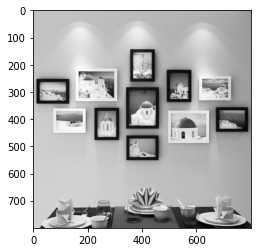

In [110]:
imshow(gray, cmap="gray")

In [111]:
edged = cv2.Canny(gray, 10, 250)

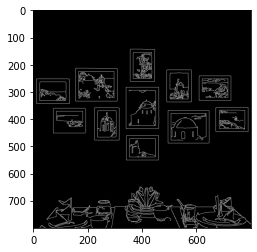

In [112]:
imshow(edged, cmap="gray")

In [113]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,
(3, 3))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE,
kernel)

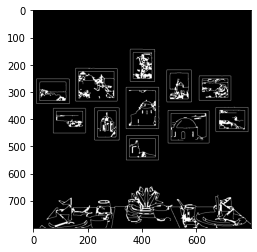

In [114]:
imshow(closed, cmap="gray")

In [115]:
cnts = cv2.findContours(closed.copy(),
cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

Всего 11 картинк на этой картинке


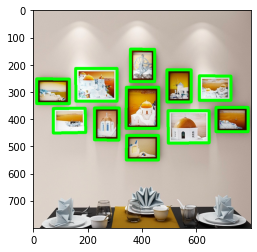

In [116]:
total = 0
for c in cnts:
  peri = cv2.arcLength(c, True)
  approx = cv2.approxPolyDP(c, 0.02 * peri, True)
  if len(approx) == 4:
    cv2.drawContours(image, [approx], -1, (0, 255, 0), 10)
    total += 1
print("Всего {0} картин на этой картинке".format(total))
imshow(image, cmap="gray")

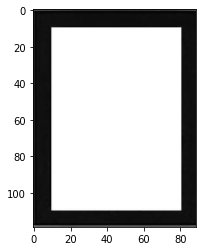

In [314]:
image = cv2.imread("55.jpg", 0)
image_copy = image.copy()
template = cv2.imread("66.png", 0)
imshow(template,cmap = 'gray')

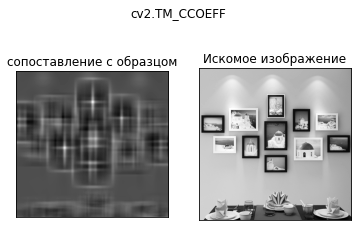

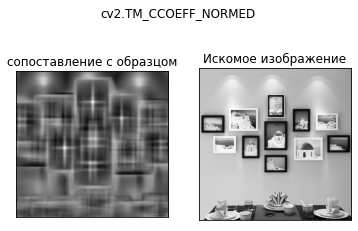

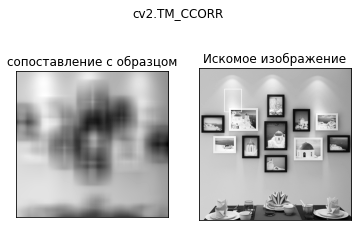

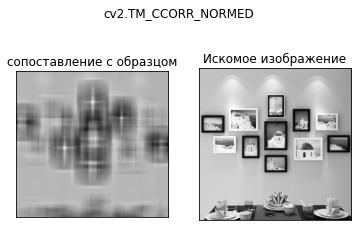

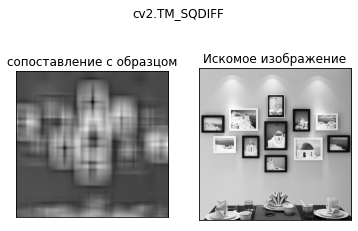

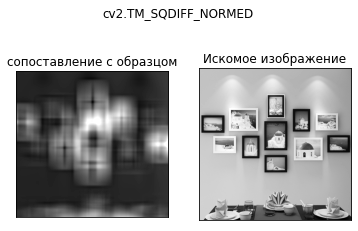

In [336]:
w, h = template.shape[::-1]
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
  img = image_copy.copy()
  method = eval(meth)
  # применяем методы
  res = cv2.matchTemplate(img,template,method)
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
  if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc 
  else:
    top_left = max_loc
  bottom_right = (top_left[0] + w, top_left[1] + h)
  cv2.rectangle(img,top_left, bottom_right, 255, 2) 
  plt.subplot(121),plt.imshow(res,cmap = 'gray')
  plt.title('сопоставление с образцом'), plt.xticks([]), plt.yticks([]) 
  plt.subplot(122),plt.imshow(img,cmap = 'gray') 
  plt.title('Искомое изображение'), plt.xticks([]), plt.yticks([]) 
  plt.suptitle(meth)
  plt.show()

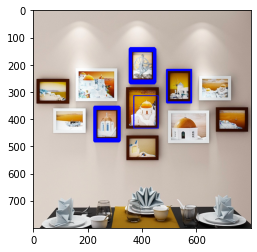

In [313]:
img_rgb = cv2.imread('55.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('66.png',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.601
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
  cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
#cv2.imwrite('res.png',img_rgb)
plt.imshow(img_rgb,cmap = 'gray')
img_rgb_1 = img_rgb
tr1 = threshold

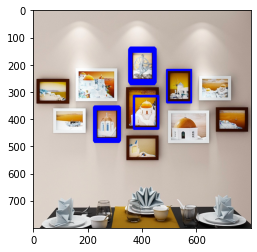

In [302]:
img_rgb = cv2.imread('55.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('66.png',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF)
threshold = 0.5e8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
  cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
#cv2.imwrite('res.png',img_rgb)
plt.imshow(img_rgb,cmap = 'gray') 
img_rgb_2 = img_rgb
tr2 = threshold

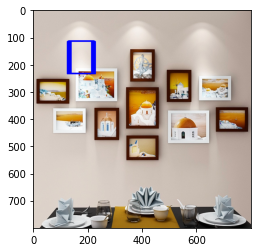

In [308]:
img_rgb = cv2.imread('55.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('66.png',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCORR)
#threshold = 0.424e9
threshold = 0.424e9
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
  cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
#cv2.imwrite('res.png',img_rgb)
plt.imshow(img_rgb,cmap = 'gray') 
img_rgb_3 = img_rgb
tr3 = threshold

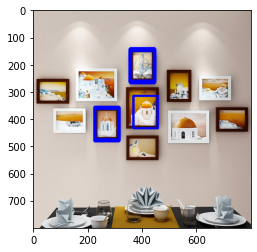

In [322]:
img_rgb = cv2.imread('55.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('66.png',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCORR_NORMED)
threshold = 0.887
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
  cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
#cv2.imwrite('res.png',img_rgb)
plt.imshow(img_rgb,cmap = 'gray') 
img_rgb_4 = img_rgb
tr4 = threshold

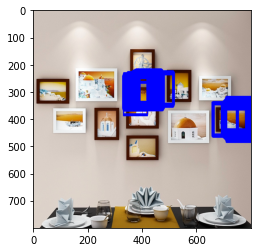

In [323]:
img_rgb = cv2.imread('55.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('66.png',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_SQDIFF_NORMED)
threshold = 1
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
  cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
#cv2.imwrite('res.png',img_rgb)
plt.imshow(img_rgb,cmap = 'gray') 
img_rgb_5 = img_rgb
tr5 = threshold

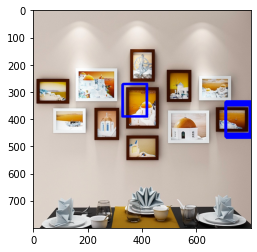

In [324]:
img_rgb = cv2.imread('55.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('66.png',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_SQDIFF)
threshold = 0.282e9
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
  cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
#cv2.imwrite('res.png',img_rgb)
plt.imshow(img_rgb,cmap = 'gray') 
img_rgb_6 = img_rgb
tr6 = threshold

<Figure size 432x288 with 0 Axes>

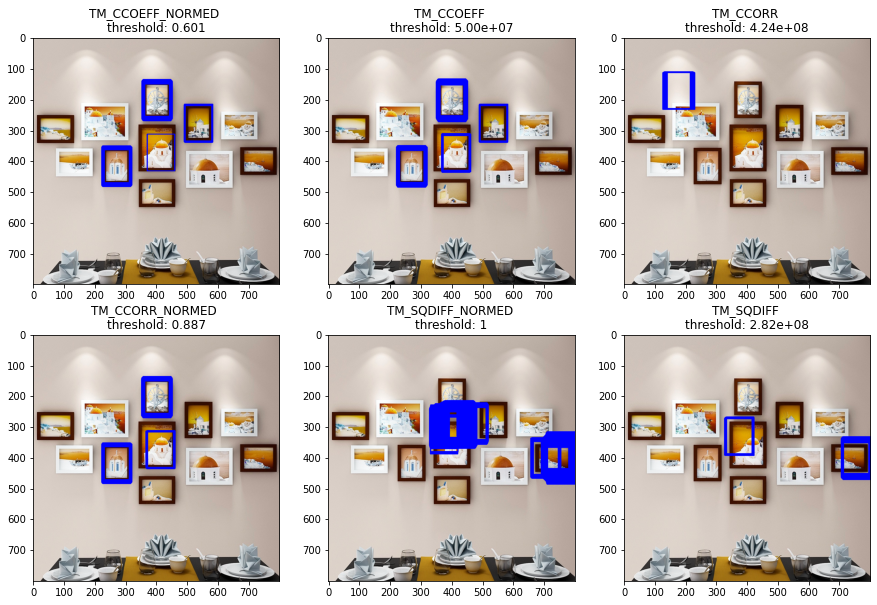

In [335]:
figure()
plt.figure(figsize=(15, 10))
subplot(2,3,1), imshow(img_rgb_1)
title('TM_CCOEFF_NORMED \n'+ 'threshold: ' +str(tr1))
subplot(2,3,2), imshow(img_rgb_2)
title('TM_CCOEFF \n'+ 'threshold: ' +str("{:.2e}".format(tr2)))
subplot(2,3,3), imshow(img_rgb_3)
title('TM_CCORR \n'+ 'threshold: ' +str("{:.2e}".format(tr3)))
subplot(2,3,4), imshow(img_rgb_4)
title('TM_CCORR_NORMED \n'+ 'threshold: ' +str(tr4))
subplot(2,3,5), imshow(img_rgb_5)
title('TM_SQDIFF_NORMED \n'+ 'threshold: ' +str(tr5))
subplot(2,3,6), imshow(img_rgb_6)
title('TM_SQDIFF \n'+ 'threshold: ' +str("{:.2e}".format(tr6)))
show()

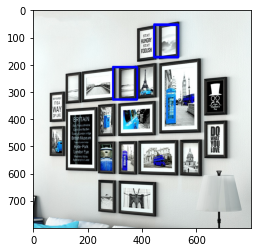

In [394]:
img_rgb = cv2.imread('test4.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('66.png',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.6
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
  cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
#cv2.imwrite('res.png',img_rgb)
plt.imshow(img_rgb,cmap = 'gray')
img_rgb_1_test = img_rgb
tr1_test = threshold

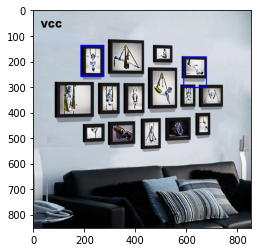

In [389]:
img_rgb = cv2.imread('test5.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('66.png',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.6
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
  cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
#cv2.imwrite('res.png',img_rgb)
plt.imshow(img_rgb,cmap = 'gray')
img_rgb_2_test = img_rgb
tr1_test = threshold

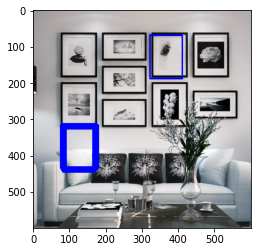

In [392]:
img_rgb = cv2.imread('test13.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('66.png',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.45
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
  cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
#cv2.imwrite('res.png',img_rgb)
plt.imshow(img_rgb,cmap = 'gray')
img_rgb_3_test = img_rgb
tr1_test = threshold

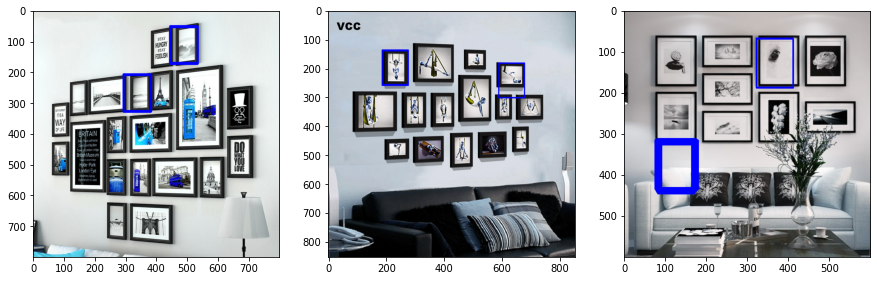

In [395]:
plt.figure(figsize=(15, 10))
subplot(1,3,1), imshow(img_rgb_1_test)
subplot(1,3,2), imshow(img_rgb_2_test)
subplot(1,3,3), imshow(img_rgb_3_test)
show()

In [14]:
!pip3 install tensorflow

    100% |████████████████████████████████| 165.1MB 7.7kB/s ta 0:00:011   19% |██████▍                         | 32.7MB 4.6MB/s eta 0:00:29    28% |█████████▎                      | 47.7MB 2.0MB/s eta 0:01:00    39% |████████████▊                   | 65.8MB 1.3MB/s eta 0:01:18    41% |█████████████▍                  | 69.0MB 981kB/s eta 0:01:38    41% |█████████████▍                  | 69.0MB 825kB/s eta 0:01:57    47% |███████████████                 | 77.8MB 1.7MB/s eta 0:00:53    51% |████████████████▌               | 85.1MB 2.0MB/s eta 0:00:41    63% |████████████████████▍           | 105.4MB 994kB/s eta 0:01:00    64% |████████████████████▊           | 107.0MB 1.5MB/s eta 0:00:39    65% |█████████████████████           | 108.2MB 1.2MB/s eta 0:00:47    68% |██████████████████████          | 113.8MB 518kB/s eta 0:01:39    73% |███████████████████████▍        | 120.9MB 511kB/s eta 0:01:27    83% |██████████████████████████▋     | 137.1MB 19.0MB/s eta 0:00:02    91% |█████████████████

    100% |████████████████████████████████| 163kB 675kB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 1.1MB/s ta 0:00:01
    100% |████████████████████████████████| 153kB 3.5MB/s ta 0:00:01
    100% |████████████████████████████████| 143kB 1.1MB/s ta 0:00:01
    100% |████████████████████████████████| 143kB 1.9MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 1.5MB/s ta 0:00:01
    100% |████████████████████████████████| 153kB 1.4MB/s ta 0:00:01
  Running setup.py install for termcolor ... done
  Found existing installation: numpy 1.19.4
    Uninstalling numpy-1.19.4:
      Successfully uninstalled numpy-1.19.4
  Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Running setup.py install for wrapt ... done
You are using pip version 9.0.1, however version 20.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [15]:
from keras.applications.vgg16 import VGG16
model = VGG16()

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:749)

In [458]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import preprocess_input


image = load_img('sphynx.jpg', target_size=(224, 224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
yhat = model.predict(image)

image1 = load_img('burm.jpeg', target_size=(224, 224))
image1 = img_to_array(image1)
image1 = image1.reshape((1, image1.shape[0], image1.shape[1], image1.shape[2]))
image1 = preprocess_input(image1)
yhat1 = model.predict(image1)

image2 = load_img('siam.jpg', target_size=(224, 224))
image2 = img_to_array(image2)
image2 = image2.reshape((1, image2.shape[0], image2.shape[1], image2.shape[2]))
image2 = preprocess_input(image2)
yhat2 = model.predict(image2)

image3 = load_img('lev.jpg', target_size=(224, 224))
image3 = img_to_array(image3)
image3 = image3.reshape((1, image3.shape[0], image3.shape[1], image3.shape[2]))
image3 = preprocess_input(image3)
yhat3 = model.predict(image3)

image4 = load_img('pant2.jpg', target_size=(224, 224))
image4 = img_to_array(image4)
image4 = image4.reshape((1, image4.shape[0], image4.shape[1], image4.shape[2]))
image4 = preprocess_input(image4)
yhat4 = model.predict(image4)


image5 = load_img('kot.jpg', target_size=(224, 224))
image5 = img_to_array(image5)
image5 = image5.reshape((1, image5.shape[0], image5.shape[1], image5.shape[2]))
image5 = preprocess_input(image5)
yhat5 = model.predict(image5)


In [459]:
from keras.applications.vgg16 import decode_predictions
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat1)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat2)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat3)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat4)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat5)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

Egyptian_cat (45.83%)
Egyptian_cat (76.44%)
Siamese_cat (99.96%)
lion (80.21%)
giant_schnauzer (37.21%)
tiger_cat (18.90%)


In [460]:

#import tf.keras.applications.ResNet152 

from tensorflow.keras.applications import ResNet152 
model2 = ResNet152()

In [461]:
yhat = model2.predict(image)
yhat1 = model2.predict(image1)
yhat2 = model2.predict(image2)
yhat3 = model2.predict(image3)
yhat4 = model2.predict(image4)
yhat5 = model2.predict(image5)

In [462]:
from tensorflow.keras.applications.resnet import decode_predictions
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat1)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat2)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat3)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat4)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat5)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

Egyptian_cat (54.51%)
Egyptian_cat (63.70%)
Siamese_cat (100.00%)
lion (99.47%)
groenendael (60.80%)
tiger_cat (64.27%)


In [463]:
from tensorflow.keras.applications import NASNetLarge
model3 = NASNetLarge()

In [464]:
yhat = model3.predict(image)
yhat1 = model3.predict(image1)
yhat2 = model3.predict(image2)
yhat3 = model3.predict(image3)
yhat4 = model3.predict(image4)
yhat5 = model3.predict(image5)

In [465]:
from tensorflow.keras.applications.nasnet import decode_predictions
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat1)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat2)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat3)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat4)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat5)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

stopwatch (90.64%)
cowboy_boot (91.41%)
bloodhound (73.12%)
stopwatch (99.70%)
cowboy_boot (94.29%)
sunglass (95.28%)


In [466]:
from tensorflow.keras.applications import DenseNet201
model4 = DenseNet201()

In [467]:
yhat = model4.predict(image)
yhat1 = model4.predict(image1)
yhat2 = model4.predict(image2)
yhat3 = model4.predict(image3)
yhat4 = model4.predict(image4)
yhat5 = model4.predict(image5)

In [468]:
from tensorflow.keras.applications.densenet import decode_predictions
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat1)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat2)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat3)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat4)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat5)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

barn (85.77%)
ski (94.32%)
tripod (77.18%)
barn (99.99%)
church (58.30%)
ski (95.97%)


In [469]:
from tensorflow.keras.applications import ResNet50
model5 = ResNet50()

In [470]:
yhat = model5.predict(image)
yhat1 = model5.predict(image1)
yhat2 = model5.predict(image2)
yhat3 = model5.predict(image3)
yhat4 = model5.predict(image4)
yhat5 = model5.predict(image5)
from tensorflow.keras.applications.resnet import decode_predictions

In [471]:
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat1)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat2)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat3)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat4)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat5)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

Mexican_hairless (90.21%)
Egyptian_cat (90.18%)
Siamese_cat (99.74%)
lion (94.12%)
groenendael (62.16%)
tiger_cat (45.44%)


In [472]:

from tensorflow.keras.applications import InceptionResNetV2
model6 = InceptionResNetV2()

In [473]:
yhat = model6.predict(image)
yhat1 = model6.predict(image1)
yhat2 = model6.predict(image2)
yhat3 = model6.predict(image3)
yhat4 = model6.predict(image4)
yhat5 = model6.predict(image5)
from tensorflow.keras.applications.inception_resnet_v2 import decode_predictions

In [474]:
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat1)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat2)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat3)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat4)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat5)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

comic_book (100.00%)
comic_book (100.00%)
comic_book (100.00%)
comic_book (100.00%)
comic_book (100.00%)
comic_book (100.00%)


In [475]:
from tensorflow.keras.applications import VGG19
model7 = VGG19()

574717952/574710816 [==============================] - 5s 0us/step


In [476]:
yhat = model7.predict(image)
yhat1 = model7.predict(image1)
yhat2 = model7.predict(image2)
yhat3 = model7.predict(image3)
yhat4 = model7.predict(image4)
yhat5 = model7.predict(image5)
from tensorflow.keras.applications.vgg19 import decode_predictions

In [477]:
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat1)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat2)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat3)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat4)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

label = decode_predictions(yhat5)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

Egyptian_cat (47.35%)
Egyptian_cat (92.35%)
Siamese_cat (99.96%)
lion (99.36%)
Scottish_deerhound (40.40%)
tabby (33.48%)
